In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

In [4]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


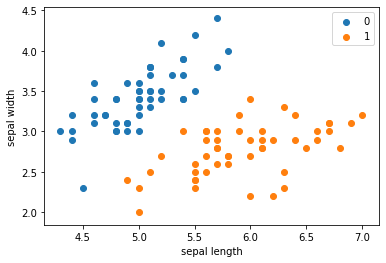

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [6]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [7]:
data[0]

array([5.1, 3.5, 0. ])

In [8]:
class Perceptron:
    
    def __init__(self):
        self.W = np.ones((len(data[0])-1), dtype=np.float32)
        self.b = 0
        self.lr = 0.25
    
    def forward(self, x, W, b):
        return np.dot(x, W) + b

    def train(self, X_train, y_train):
        
        find_wrong = True
        
        while find_wrong:
            find_wrong = False
            wrong_cnt = 0
            
            for i in range(len(X_train)):
                X = X_train[i] 
                y = y_train[i]
                
                if y * self.forward(X, self.W, self.b) < 0:
                    self.W += self.lr * np.dot(y, X)
                    self.b += self.lr * y
                    find_wrong = True
#                 if wrong_cnt:
#                     find_wrong = True

In [9]:
perceptron = Perceptron()
perceptron.train(X, y)

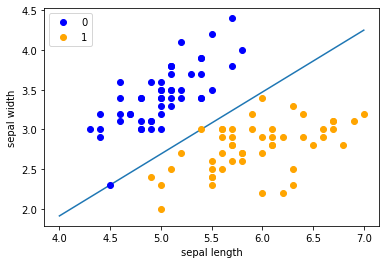

In [10]:
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.W[0] * x_points + perceptron.b) / perceptron.W[1]
plt.plot(x_points, y_)

plt.plot(data[:50, 0], data[:50, 1], 'bo', color='blue', label='0')
plt.plot(data[50:100, 0], data[50:100, 1], 'bo', color='orange', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()